
# Project: Investigate a Dataset - [No-show appointments ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show upfor their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

●  it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

### Dataset Description 

We have a dataset of patients that show up or miss their appointments we will anaylze it

### Question(s) for Analysis
What are the factors that will help us predict if patient will skip appointment or show up


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we  will load in the data, check for cleanliness, and then trim and clean our dataset for analysis



In [2]:
# Loading data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
#data shape
df.shape

(110527, 14)

In [4]:
#Checking if there are any missing values and Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Checking if there are any duplicates
df.duplicated().sum()

0

In [6]:
#Checking for number of unique patients
df['PatientId'].nunique()

62299

In [7]:
#Checking for duplicted patients
df['PatientId'].duplicated().sum()

48228

In [8]:
df.duplicated(['PatientId','No-show']).sum()

38710

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The min  age value is (-1) which probably is a mistake that will be dealth with

Mean age of patients is (37)

Max age is (115)


In [9]:
mistake = df.query('Age == "-1"')
mistake

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
We will clean our data from any mistakes 

In [10]:
#First we will drop the -1 age from our data
df.drop(index=99832,inplace = True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


min age value isn't (-1) anymore

In [11]:
#Correcting the names of columns
df.rename(columns = {'Hipertension':'Hypertension'} , inplace=True)
df.rename(columns = {'No-show':'No_show'} , inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Convert PatientId to integer 
df['PatientId'] = df['PatientId'].astype(int)

In [13]:
#droping all duplicate for patient( not showing / show up) more than once 
df.drop_duplicates(['PatientId','No_show'] ,inplace = True)
df.shape

(71816, 14)

In [14]:
#Droping unncessary content that won't help us in our analysis (patient Id ,AppointmentID , ScheduledDay and AppointmentDay)
df.drop(['PatientId','AppointmentID'] , axis= 1 ,inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
#conver shcheduleday and appointment day from string to datetime
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

<a id='eda'></a>
## Exploratory Data Analysis

Now after we've trimmed and cleaned our data, we're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that i posed in the Introduction section.



## Explore Data

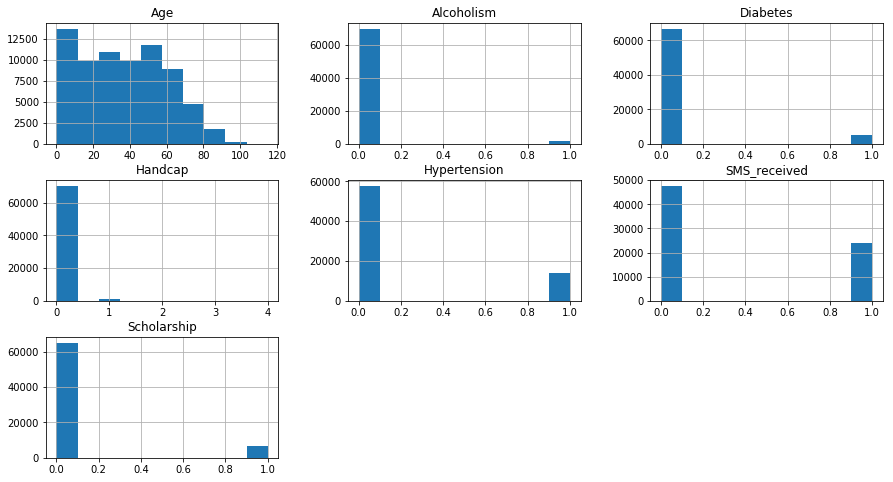

In [18]:
df.hist(figsize = (15,8));

Most for patients dont drink alcohol.
Most of patients are not handicaped.
Patients recieved SMS are half patients who didn't recieve SMS.

In [19]:
#spliting data frame into two dataframes
Show_up = df.No_show =='No'
miss_appointment = df.No_show == 'Yes'


In [20]:
#getting count of patient who missed their Appointment
df[miss_appointment].count() 


Gender            17663
ScheduledDay      17663
AppointmentDay    17663
Age               17663
Neighbourhood     17663
Scholarship       17663
Hypertension      17663
Diabetes          17663
Alcoholism        17663
Handcap           17663
SMS_received      17663
No_show           17663
dtype: int64

In [21]:
#getting count of patient who showed up to their Appointment
df[Show_up].count()

Gender            54153
ScheduledDay      54153
AppointmentDay    54153
Age               54153
Neighbourhood     54153
Scholarship       54153
Hypertension      54153
Diabetes          54153
Alcoholism        54153
Handcap           54153
SMS_received      54153
No_show           54153
dtype: int64

In [22]:
#lets get mean of each
df[miss_appointment].mean()

Age             34.376267
Scholarship      0.108419
Hypertension     0.170922
Diabetes         0.065108
Alcoholism       0.029440
Handcap          0.017777
SMS_received     0.453094
dtype: float64

In [23]:
df[Show_up].mean()

Age             37.229166
Scholarship      0.091334
Hypertension     0.202944
Diabetes         0.072868
Alcoholism       0.023600
Handcap          0.020904
SMS_received     0.297232
dtype: float64

We can notice that mean of SMS_received in miss_appointment is higher than mean of the show up

### Factors affecting patients attendance

## Does Age affect the attendance of patients?

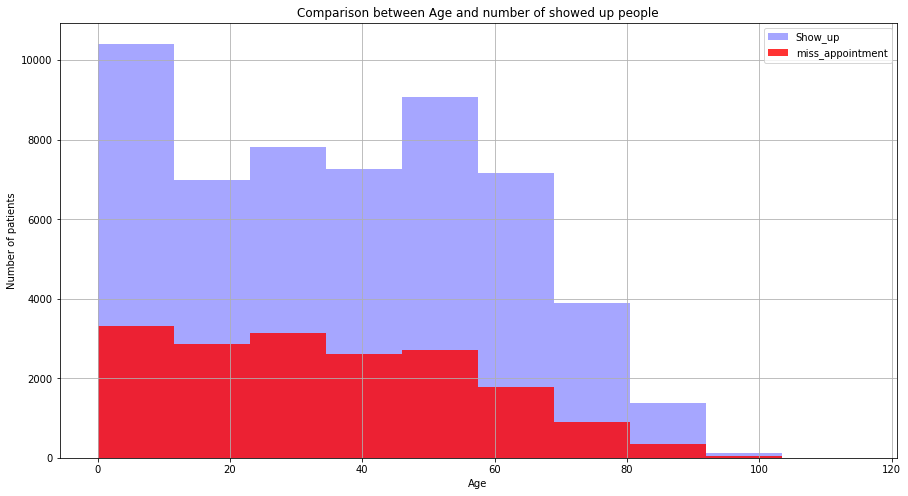

In [24]:
## this is a function that compares between people who showed and and who didnt
def showing(col_name,x_axis,y_axis,title):
    
    plt.figure(figsize = (15,8))
    df[col_name][Show_up].hist(alpha = 0.35, bins = 10,color = 'blue',label = 'Show_up')
    df[col_name][miss_appointment].hist(alpha = 0.8, bins = 10,color = 'red',label = 'miss_appointment')
    plt.legend();
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    
showing('Age','Age' , 'Number of patients',"Comparison between Age and number of showed up people")

As we can see Age between 0 and 20 are most patients who show up and as age get higher the patients tends to miss their appointment

## Does Gender affects attendance?


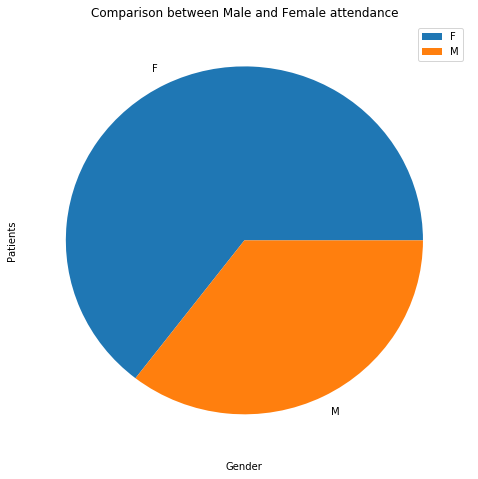

In [32]:
def attending(data, title_2):
    
    plt.figure(figsize=(8,8))
    df['Gender'][data].value_counts(normalize = True).plot(kind = 'pie')
    plt.legend();
    plt.title(title_2)
    plt.xlabel('Gender')
    plt.ylabel('Patients');
    
attending(Show_up,'Comparison between Male and Female attendance')

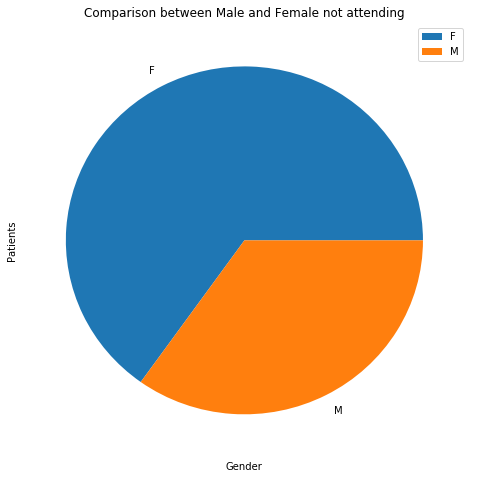

In [33]:
attending(miss_appointment,'Comparison between Male and Female not attending')

From the opposite graph we can estimate that gender doesnt affect the attendance of patients

## Does SMS recieved affects the attendance?

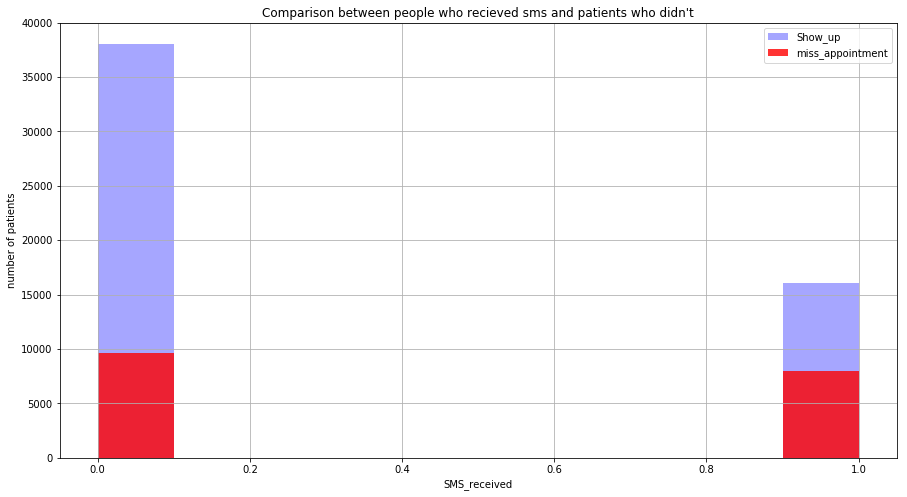

In [79]:
showing('SMS_received','SMS_received','number of patients','Comparison between people who recieved sms and patients who didn\'t')

From oppiste graph we can see that the patients who didn't receive sms showed up more than patients who received an sms

## Does being a handcaped affects the attendance?


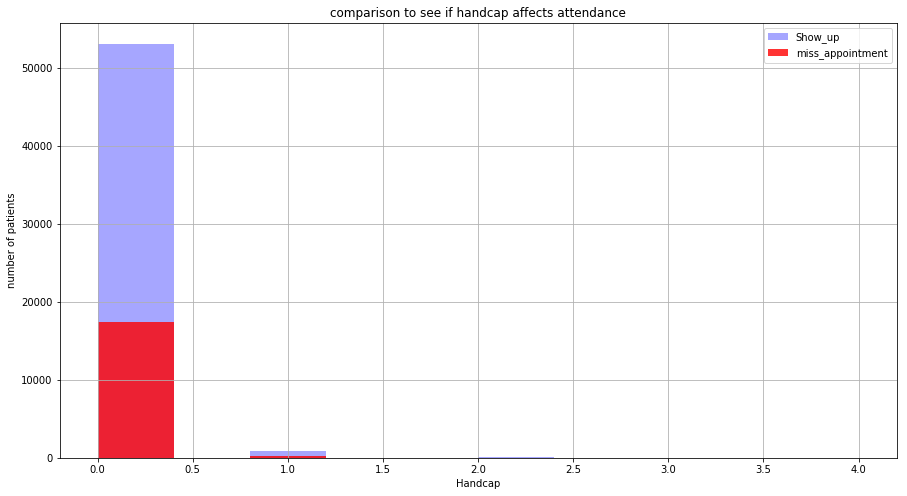

In [26]:
showing('Handcap','Handcap','number of patients','comparison to see if handcap affects attendance')

From opposite graph we can estimate that being handcap doesn't affect the attendance

## which day has more attendance

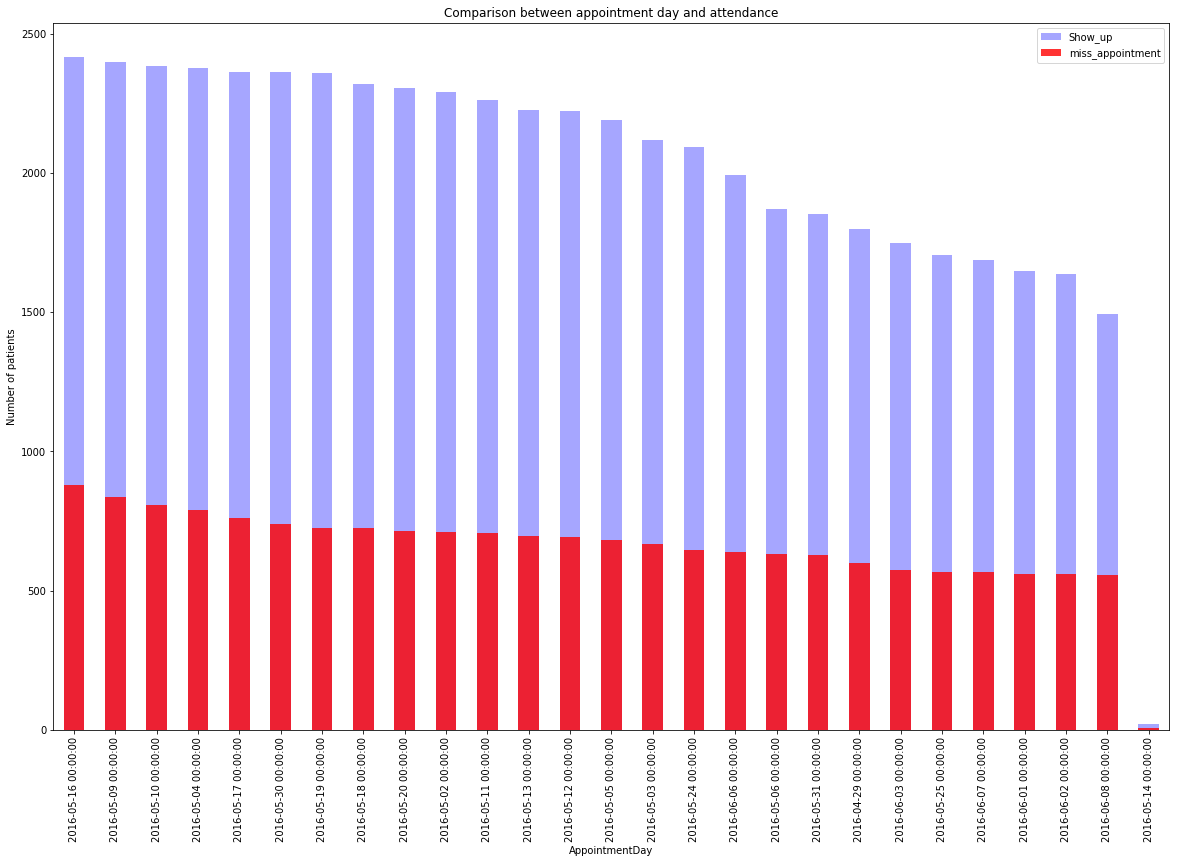

In [36]:
def bar_graph(col_name2 ,title):

    plt.figure(figsize = (20,13))

    df[col_name2][Show_up].value_counts().plot(kind= 'bar', alpha = 0.35,color = 'blue',label = 'Show_up')
    df[col_name2][miss_appointment].value_counts().plot(kind = 'bar' , alpha = 0.8 ,color = 'red',label = 'miss_appointment')

    plt.legend();
    plt.title(title)
    plt.xlabel(col_name2)
    plt.ylabel('Number of patients');

bar_graph('AppointmentDay','Comparison between appointment day and attendance')

Appointment day has a slight effect on attendance

## Does nigherbourhood affects the attendance?



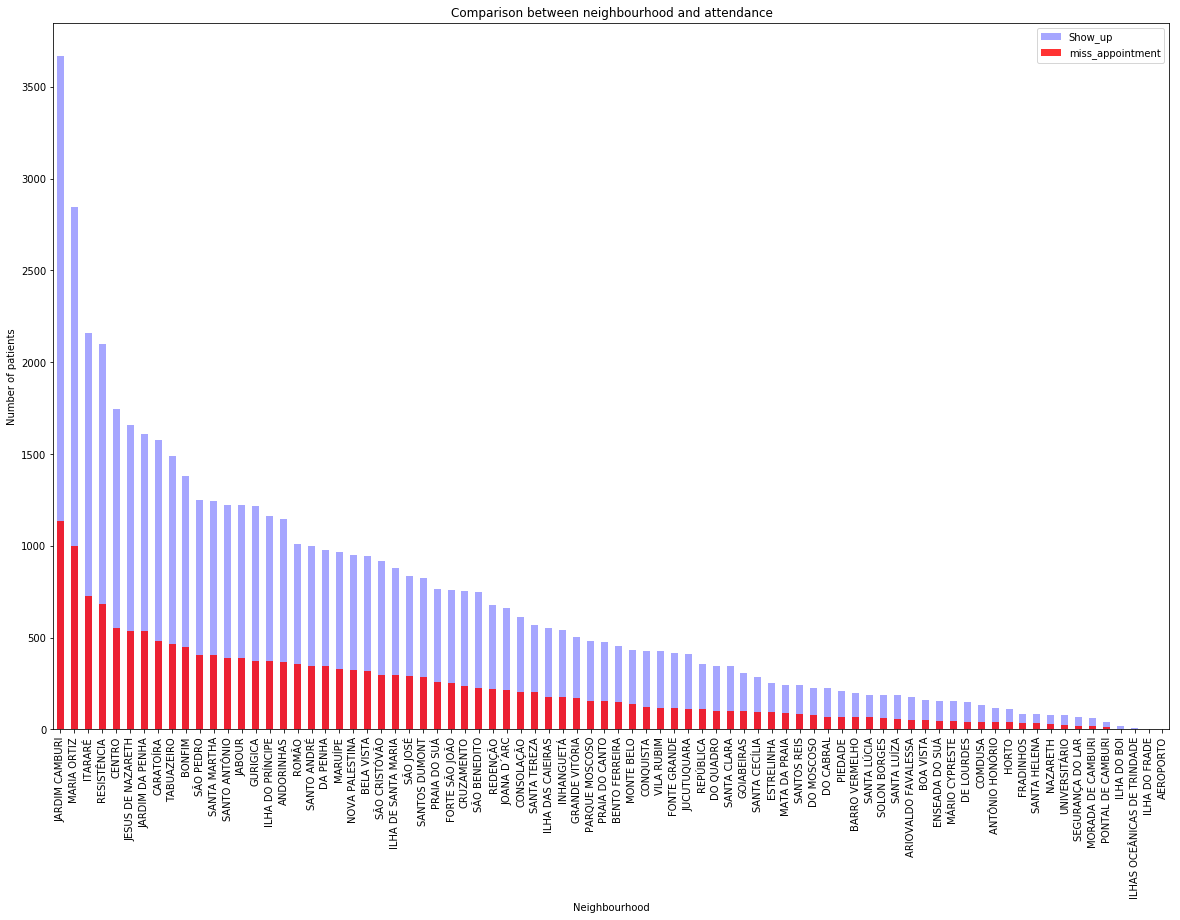

In [37]:
bar_graph('Neighbourhood','Comparison between neighbourhood and attendance')

From the oppiste graph we can estimate that neigherbourhood affects the attendance of patients 

<a id='conclusions'></a>
## Conclusions
Factors :

● Ages affects the attendace greatly as we can see young patients tends more to attende their appointment , but old patients     tends to skip and not show up

●Number of patients who showed up and didnt receive an sms is higher than patients who showed up and recieved an sms 
which mean that sms massege should be checked

●Neighbourhood has a great infleunce on attending

●Appointment day has a slight effect on attendace of patients


## limitation
●Gender doesnt affects the attendce of patients


In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0